**Step−1** 
**import the required packages**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


- DATA-1:Here we will take the data which follows normal distribution
- DATA-2:Based on above data we will create a another data by multiplying some value
- so that both data sets have multicollinearity
- the both datasets have some covariance
- then we will aplly PCA
- will create two new PCs, will check the covariance matrix again
- so the PCs covariance should be zero

**Step−2**
**Create the data**

- we will take x
- we will tAKE Y
- we will take a data such a way both x and y have relation
- will calculate covariance
- will plot scatter plot
- will calculate eign and eign from covariance
- new data = old data * eignevectors
- pc1 and pc2 cov== no ralation

In [7]:
# will create a data having some multicollinearity
x=np.random.normal(200,10,500) # mean=200, std=10,, no of observations
x.mean()

199.54258941100056

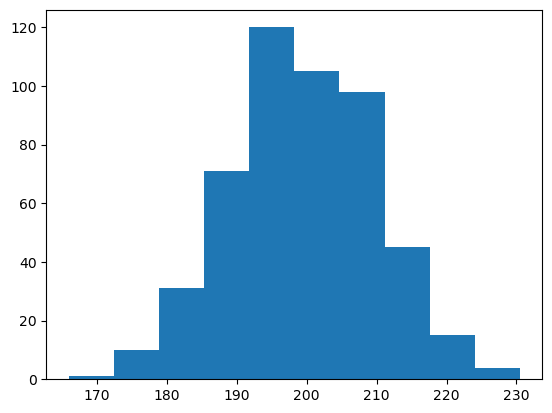

In [8]:
plt.hist(x)
plt.show()

In [9]:
# craete a data y, should be correlate to x
y=0.5*x + np.random.normal(10,5,500)
# we are taking random samples
# and we are adding x data to the samples
print("mean:",y.mean())
print("std:",y.std())

mean: 110.24306890414661
std: 7.128898807465113


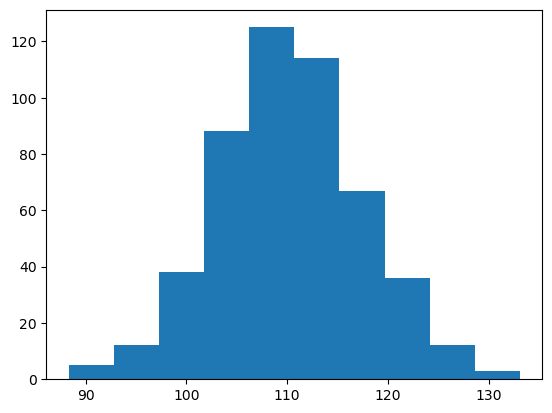

In [10]:
plt.hist(y)
plt.show()

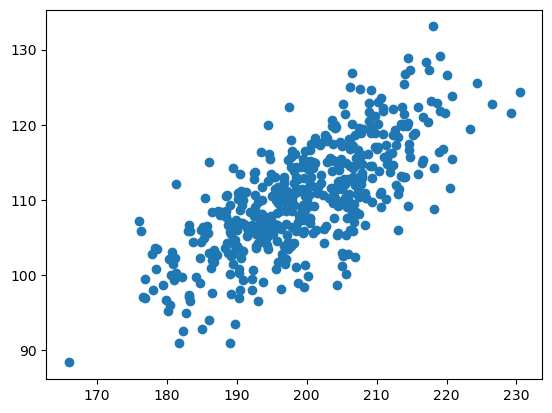

In [11]:
plt.scatter(x,y)
plt.show()

**observations**
- Both points are correlated each other
- Both points are not orthogonal to each other
- perform covariance matrix for better idea

**Step-4: Covariance matrix**


In [12]:
cov_mat=np.cov(x,y)
cov_mat

array([[103.68648449,  53.21861061],
       [ 53.21861061,  50.9230443 ]])

<Axes: >

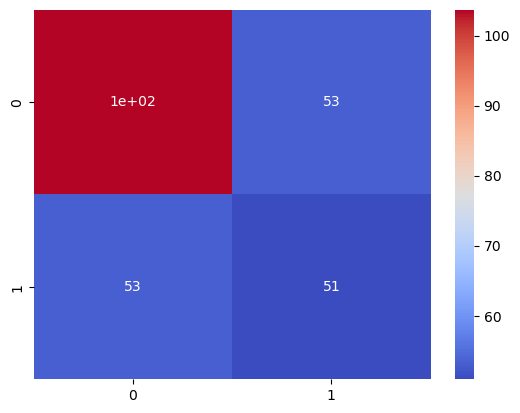

In [13]:
import seaborn as sns
sns.heatmap(cov_mat,annot=True,cmap='coolwarm')

In [14]:
# variance = 99.03
# variance =x
np.sum(np.square(x-np.mean(x)))/499

103.6864844909977

In [15]:
# cova(x,y)
a=x-np.mean(x)
b=y-np.mean(y)
np.sum(a*b)/499

53.21861061221801

In [16]:
#import seaborn as sns
#sns.heatmap(cov_mat,annot=True)

**Step−5**

- Perform the PCA

- to reduce the dimensions

- to avoid multi collinearity

- to make data has orthogonal

**will caluculate eigan vecots and eigan values of covariance**

In [17]:
from numpy.linalg import eig
eig_values,eig_vectors=eig(cov_mat)

In [18]:
eig_vectors

array([[ 0.84974872, -0.52718792],
       [ 0.52718792,  0.84974872]])

In [19]:
eig_values

array([136.70354949,  17.9059793 ])

**observations**

- we have two data samples x and y, so we have **2x2 covariance matrix**
- when we apply eigan values and eigan vectors on 2x2 cov matrix, will get **two eigan values and two eigan vectors**
- Eigen vectors will give the indicaton to **which direction data should flow**
- If you see eigan vectors the magnitude is same but the direction is different
- The dot product of eigan values either one or Zero, indicates **orthogonality**
- Eigan value represnts how much data should flow along that particular diection

**Check point-1**

- Perform the dot product of two eigen vectors

- cos90 is zero

- we are expecting dot product of two eigen vectors is zero

- dot product means cos

- cross product means sin

- dot product : cosine similarity

In [20]:
v1=eig_vectors[0]
v2=eig_vectors[1]

In [21]:
np.dot(v1,v2)

0.0

**check point-2**

- 
Data variance along each directio- 

Percentage of data flows in each direct- on

we will use eigen values , each eigen value divided by sum of the eigen values

In [22]:
eig_values

array([136.70354949,  17.9059793 ])

In [23]:
127/(127+20),20/(127+20)

(0.8639455782312925, 0.1360544217687075)

In [24]:
print("the variance percentage:",eig_values[0]*100/sum(eig_values))
print("the variance percentage:",eig_values[1]*100/sum(eig_values))

the variance percentage: 88.4185797353625
the variance percentage: 11.581420264637503


# step-6
**Create a new Pc's data**- 
new data= old data * eigen vectors

In [25]:
z=np.vstack([x,y]).T
# stacking means together
# vertically stacking
# T = Transpose of the data
# X  y
z

array([[199.52212776, 114.82140341],
       [203.4767575 , 111.53172685],
       [202.51075086, 104.18841713],
       [197.78312569, 114.38471598],
       [212.17779391, 116.17933234],
       [216.67561405, 121.07249229],
       [209.26556636, 124.56821789],
       [185.12342447, 106.33223558],
       [209.72102337, 118.90859935],
       [193.09123923, 106.19340747],
       [194.58874279, 116.05768475],
       [199.27116461, 111.50681634],
       [191.46423221, 106.49050181],
       [194.88360393, 113.40465732],
       [211.38593915, 117.28882628],
       [207.47889584, 110.42264811],
       [199.68073458, 116.43922329],
       [196.94624464, 101.40288626],
       [180.49755386,  96.02637035],
       [207.08051696, 114.68636927],
       [204.51076753, 105.6215034 ],
       [198.99130541, 108.03490604],
       [207.32342119, 116.63468857],
       [217.1070654 , 128.39730728],
       [197.36546203, 110.56961953],
       [202.73142206, 106.53146173],
       [205.95610072, 102.75936198],
 

In [26]:
eig_vectors

array([[ 0.84974872, -0.52718792],
       [ 0.52718792,  0.84974872]])

In [27]:
np.dot([188.5387452, 98.15254732],[0.85632617,-0.51643536])
print(188*0.85)
print(98*0.5)
49+159

159.79999999999998
49.0


208

In [28]:
np.dot([188.53587425,  98.15254732],eig_vectors)

array([211.95295611, -15.98883431])

In [29]:
2.12137650e+02

212.13765

In [30]:
# dot product of old data and eigen vectors
new_data=np.dot(z,eig_vectors)
new_data

array([[ 2.30076131e+02, -7.61631531e+00],
       [ 2.31702294e+02, -1.24965468e+01],
       [ 2.27010127e+02, -1.82272478e+01],
       [ 2.28368200e+02, -7.07060900e+00],
       [ 2.41546151e+02, -1.31343313e+01],
       [ 2.47947782e+02, -1.13475713e+01],
       [ 2.43494008e+02, -4.47059531e+00],
       [ 2.13365464e+02, -7.23915234e+00],
       [ 2.40897350e+02, -9.51996038e+00],
       [ 2.20062916e+02, -1.15576571e+01],
       [ 2.26535746e+02, -3.96496584e+00],
       [ 2.28115465e+02, -1.03005767e+01],
       [ 2.18836993e+02, -1.04474631e+01],
       [ 2.25387660e+02, -6.37481974e+00],
       [ 2.41458185e+02, -1.17740840e+01],
       [ 2.34518413e+02, -1.55488640e+01],
       [ 2.31063802e+02, -6.32519052e+00],
       [ 2.20813197e+02, -1.76607087e+01],
       [ 2.04001509e+02, -1.35578450e+01],
       [ 2.36427674e+02, -1.17157519e+01],
       [ 2.29465145e+02, -1.80638692e+01],
       [ 2.26047306e+02, -1.31032897e+01],
       [ 2.37661212e+02, -1.01882262e+01],
       [ 2.

In [31]:
new_data=np.dot(z,eig_vectors)
new_data=pd.DataFrame(new_data,columns=['PC1','PC2'])
new_data
# under these two pc2 we will select pc1
# then Ml model will develop on PC1

,PC1,PC2
0,230.076131,-7.616315
1,231.702294,-12.496547
2,227.010127,-18.227248
3,228.368200,-7.070609
4,241.546151,-13.134331
...,...,...
495,232.918474,-12.565493
496,236.213336,-5.572464
497,218.144485,-11.547320
498,223.087619,-14.488721


$step-7$

**check point-3: Covariance of the new data**

In [32]:
pc1=new_data['PC1'].values
pc2=new_data['PC2'].values
np.cov(pc1,pc2)
# -1.24166987/100000000000000000000000000000

array([[1.36703549e+02, 8.88534403e-15],
       [8.88534403e-15, 1.79059793e+01]])

$step-8$

**Scatter plot of new pcs data**

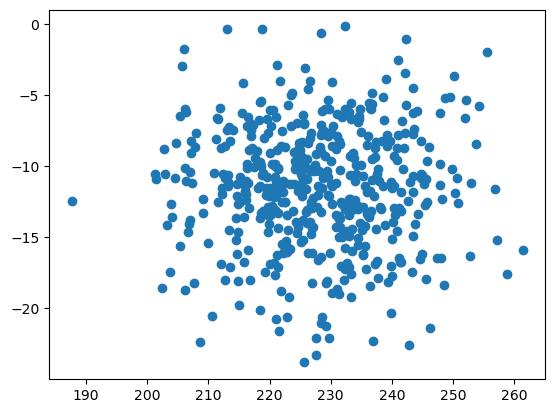

In [33]:
plt.scatter(new_data['PC1'],new_data['PC2'])
plt.show()

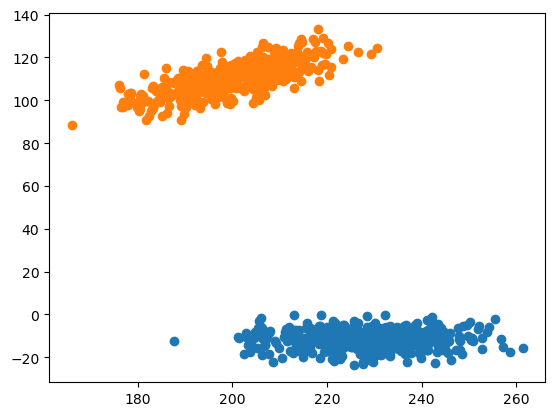

In [34]:
plt.scatter(new_data['PC1'],new_data['PC2']) # Blue no correlation
plt.scatter(x,y) # Orange correlation
plt.show()

**Obesrvations**

- we create a new data has two pcs

- The two pcs includes old data

- The two pcs are indepenedent each other

- The variance along PC1 is greater than PC2

- So we can choose only one component i.e. PC1

**Using package**

In [35]:
# Import the packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [36]:
x=np.random.normal(200,10,500)
y=0.5*x + np.random.normal(10,5,500)
z=np.vstack([x,y]).T

In [37]:
pca=PCA(n_components=2) # how many pc's
pca.fit(z)

PCA(n_components=2)

In [38]:
pca.transform(z)

array([[ 6.56645706e-02,  1.19363024e+01],
       [-5.00339464e+00,  4.94876418e+00],
       [-1.86662395e+01,  4.83591101e-01],
       [ 9.77156880e+00, -1.21818346e+01],
       [ 1.02216203e+01, -4.14959510e-01],
       [ 3.35046653e+00,  7.53903820e+00],
       [ 2.71139370e+01, -1.10591070e+01],
       [ 9.92300563e+00, -1.55145809e+00],
       [ 1.63289942e+01,  7.80768551e-01],
       [ 7.77873840e+00, -2.11935744e-02],
       [-1.95638631e+01,  3.38488912e+00],
       [ 3.19495525e+00,  1.19552482e+00],
       [ 5.85345429e+00, -4.88787752e+00],
       [ 9.95802241e+00,  5.30035192e-01],
       [ 4.32144790e+00,  3.13316653e+00],
       [ 1.18284740e+01, -1.20061399e+00],
       [-1.43662522e+01,  6.13162813e+00],
       [-3.48659304e+00, -4.60396038e+00],
       [ 1.63919266e+01, -8.86376881e+00],
       [ 8.22136018e+00,  4.33597079e+00],
       [ 5.96255373e-01, -6.28800416e+00],
       [ 2.93694226e-01, -5.23997679e+00],
       [-2.05093925e+01, -3.32914033e+00],
       [-1.

**explained   variance   ratio**

- Expalined variance ratio is means variance percentage in each axis
- it is same as eigen values


In [39]:
pca.explained_variance_

array([132.29886797,  19.16316211])

In [40]:
126.63714313/(126.63714313+20)

0.8636089085405247

- Step-1: Covariance matrix of data

- Step-2: We will calculate Eigen vectors and Eigen values

- Step-3: Eigen vector will give the direction

- Step-4: Eigen values will give the amount of variance

- Step-5: PC1 and PC2 new axis will form based on eigen vectors

- Step-6: Var(PC1)>>>var(PC2) : 130.3107954 , 15.61458758

- Step-7: 130/(130+15) = 89%

- Sklearn package These eigen values is called by explained_variance [126.63714313, 20.0074381 ]

- Percentage of variance : 126/126+20= by explalined variance ratio

# perform on data

In [41]:
# read the data
data=pd.read_csv(r'C:\Users\saiprithi\Documents\naresh it\datasience ai\xsel_sheets\winequality_red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
# If drop duplicates are there
#data=data.drop_duplicates()
#data=data.reset_index(drop=True)

In [43]:
X=data.drop('quality',axis=1)

- Total there are 12 columns

- 11 columns are input

- 1 column output

- we need to apply PCA on 11 columns

- PCA also gives 11 pc's, buy we can choose less features which covers maximum variance

- here we are choosing 6 PCs

In [44]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca.fit(X)

PCA(n_components=6)

In [45]:
pca_data=pca.transform(X) # input data
len(pca_data[0]),len(pca_data)
# Original data has 1599 rows
# Original data has 11 columns is converted into 6 columns
# Thats why we each tuple 6 values are there

(6, 1599)


$ Q1) :Sir One doubt if during training we are doing PCA then while testing when we pass input then also PCA needs to be done on the test input data ?$

- Training data will create one model
- Model is developed by how many columns
- that many column values only used for testing

- PCA for entire data first
- while developing the model we will divide the data into
- train and test

- Suppose if we create a data with 11 columns
- for test data also we should use 11 columns data


# Q2) Sir that means PCA should be done on the given data set in the EDA stage or Model development stage?

        PCA will do before model development
        Feature selection method

# Q3)  Is PCA apply for Categorical data

     No, PCA concept related to Covarinace means maths
     Categorical data can apply one hot encoder automatically will provide orthogonality 

In [46]:
# 6 pcs consider as input column also
new_data=pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [47]:
# we need to add output column also
new_data['quality']=data['quality']

In [48]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,quality
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,0.198018,5
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,0.301325,5
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,0.205114,5
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,-0.089092,6
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,0.198018,5
...,...,...,...,...,...,...,...
1594,1.129111,16.313102,-1.860069,-0.257109,-0.200974,0.058238,5
1595,9.489984,21.627525,-1.986558,-0.027199,0.443711,-0.040335,6
1596,-3.431354,14.271243,-1.750719,0.174652,0.236271,-0.089513,6
1597,1.132878,16.316167,-2.134414,-0.235388,-0.519028,-0.015548,5


In [49]:
pca.explained_variance_ratio_
# 6 pcs has different variances
# first variance has 0.94, which means 94%

array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04, 3.45607218e-05])

In [50]:
np.sum(pca.explained_variance_ratio_)

0.9999615354947832

In [51]:
pca.explained_variance_

array([1.13380708e+03, 5.79354108e+01, 3.10130228e+00, 1.81941532e+00,
       1.04634036e+00, 4.13967294e-02])